In [1]:
import dowhy
from causalgraphicalmodels import CausalGraphicalModel
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',35)
import sys
sys.path.append("../scripts/")
from plot import plot_distribution
import warnings
warnings.filterwarnings('ignore')
from dowhy import CausalModel
from IPython.display import Image, display

In [2]:
# Config dict to set the logging level
import logging.config
DEFAULT_LOGGING = {
    'version': 1,
    'disable_existing_loggers': False,
    'loggers': {
        '': {
            'level': 'WARN',
        },
    }
}
logging.config.dictConfig(DEFAULT_LOGGING)
# Disabling warnings output
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [3]:
df = pd.read_csv("../data/scaled_data.csv")
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1     1.097064     -2.073335        1.269934   0.984375   
1          1     1.829821     -0.353632        1.685955   1.908708   
2          1     1.579888      0.456187        1.566503   1.558884   
3          1    -0.768909      0.253732       -0.592687  -0.764464   
4          1     1.750297     -1.151816        1.776573   1.826229   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0         1.568466          3.283515        2.652874             2.532475   
1        -0.826962         -0.487072       -0.023846             0.548144   
2         0.942210          1.052926        1.363478             2.037231   
3         3.283553          3.402909        1.915897             1.451707   
4         0.280372          0.539340        1.371011             1.428493   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0       2.217515                2.255747   2.489734   -0.565265      2.833031   
1       0.001392               -0.868652   0.499255   -0.876244      0.263327   
2       0.939685               -0.398008   1.228676   -0.780083      0.850928   
3       2.867383                4.910919   0.326373   -0.110409      0.286593   
4      -0.009560               -0.562450   1.270543   -0.790244      1.273189   

    area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0  2.487578      -0.214002        1.316862      0.724026           0.660820   
1  0.742402      -0.605351       -0.692926     -0.440780           0.260162   
2  1.181336      -0.297005        0.814974      0.213076           1.424827   
3 -0.288378       0.689702        2.744280      0.819518           1.115007   
4  1.190357       1.483067       -0.048520      0.828471           1.144205   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0     1.148757              0.907083      1.886690      -1.359293   
1    -0.805450             -0.099444      1.805927      -0.369203   
2     0.237036              0.293559      1.511870      -0.023974   
3     4.732680              2.047511     -0.281464       0.133984   
4    -0.361092              0.499328      1.298575      -1.466770   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0         2.303601    2.001237          1.307686           2.616665   
1         1.535126    1.890489         -0.375612          -0.430444   
2         1.347475    1.456285          0.527407           1.082932   
3        -0.249939   -0.550021          3.394275           3.893397   
4         1.338539    1.220724          0.220556          -0.313395   

   concavity_worst  concave points_worst  symmetry_worst  \
0         2.109526              2.296076        2.750622   
1        -0.146749              1.087084       -0.243890   
2         0.854974              1.955000        1.152255   
3         1.989588              2.175786        6.046041   
4         0.613179              0.729259       -0.868353   

   fractal_dimension_worst  high_radius  
0                 1.937015        False  
1                 0.281190         True  
2                 0.201391         True  
3                 4.935010        False  
4                -0.397100         True

**Problem definition: a radius_mean > 18 leads to breast tumors being diagnosed as malignant (diagnosis = 1)**

* Given that we have so many features, we use feature selection in logistic reg 

In [4]:
from sklearn.linear_model import LogisticRegression

X = df.drop(['diagnosis','high_radius'],axis=1)
y = df.diagnosis.values

print(X.shape)
print(y.shape)

(569, 30)
(569,)


Feature: 0, Score: 0.36317
Feature: 1, Score: 0.38770
Feature: 2, Score: 0.35111
Feature: 3, Score: 0.43556
Feature: 4, Score: 0.16176
Feature: 5, Score: -0.56260
Feature: 6, Score: 0.85990
Feature: 7, Score: 0.96222
Feature: 8, Score: -0.07617
Feature: 9, Score: -0.32219
Feature: 10, Score: 1.29103
Feature: 11, Score: -0.26893
Feature: 12, Score: 0.65989
Feature: 13, Score: 1.01250
Feature: 14, Score: 0.27717
Feature: 15, Score: -0.73628
Feature: 16, Score: -0.11053
Feature: 17, Score: 0.33351
Feature: 18, Score: -0.29590
Feature: 19, Score: -0.68092
Feature: 20, Score: 1.02936
Feature: 21, Score: 1.31459
Feature: 22, Score: 0.82332
Feature: 23, Score: 1.01059
Feature: 24, Score: 0.67073
Feature: 25, Score: -0.04466
Feature: 26, Score: 0.87330
Feature: 27, Score: 0.91196
Feature: 28, Score: 0.88790
Feature: 29, Score: 0.47983


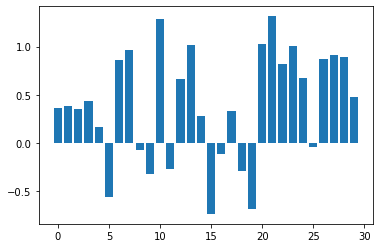

In [5]:
import matplotlib.pyplot as plt

log = LogisticRegression()
log.fit(X,y)
feature_importance = log.coef_[0]
for i,v in enumerate(feature_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(feature_importance))], feature_importance)
plt.show()

***The positive scores indicate a feature that predicts class 1(diagnosis=M), whereas the negative scores indicate a feature that predicts class 0(diagnosis=B).***

***We focus on those features with a positive score***

In [6]:
features = pd.DataFrame()
features['names'] = X.columns.to_list()
features['score'] = log.coef_[0]
features.head()

names     score
0      radius_mean  0.363171
1     texture_mean  0.387703
2   perimeter_mean  0.351114
3        area_mean  0.435559
4  smoothness_mean  0.161765

In [7]:
f = features[features['score']>0]
f.sort_values(by='score',ascending=False)

names     score
21            texture_worst  1.314593
10                radius_se  1.291035
20             radius_worst  1.029361
13                  area_se  1.012501
23               area_worst  1.010594
7       concave_points_mean  0.962222
27     concave points_worst  0.911958
28           symmetry_worst  0.887897
26          concavity_worst  0.873301
6            concavity_mean  0.859898
22          perimeter_worst  0.823317
24         smoothness_worst  0.670731
12             perimeter_se  0.659887
29  fractal_dimension_worst  0.479831
3                 area_mean  0.435559
1              texture_mean  0.387703
0               radius_mean  0.363171
2            perimeter_mean  0.351114
17        concave points_se  0.333510
14            smoothness_se  0.277170
4           smoothness_mean  0.161765

In [8]:
#we focus on these features
#high_radius = True, where radius mean >18
cols = f['names'].to_list()
cols.extend(['diagnosis','high_radius'])
training = df[cols]
training.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   concavity_mean  concave_points_mean  radius_se  perimeter_se   area_se  \
0        2.652874             2.532475   2.489734      2.833031  2.487578   
1       -0.023846             0.548144   0.499255      0.263327  0.742402   
2        1.363478             2.037231   1.228676      0.850928  1.181336   
3        1.915897             1.451707   0.326373      0.286593 -0.288378   
4        1.371011             1.428493   1.270543      1.273189  1.190357   

   smoothness_se  concave points_se  radius_worst  texture_worst  \
0      -0.214002           0.660820      1.886690      -1.359293   
1      -0.605351           0.260162      1.805927      -0.369203   
2      -0.297005           1.424827      1.511870      -0.023974   
3       0.689702           1.115007     -0.281464       0.133984   
4       1.483067           1.144205      1.298575      -1.466770   

   perimeter_worst  area_worst  smoothness_worst  concavity_worst  \
0         2.303601    2.001237          1.307686         2.109526   
1         1.535126    1.890489         -0.375612        -0.146749   
2         1.347475    1.456285          0.527407         0.854974   
3        -0.249939   -0.550021          3.394275         1.989588   
4         1.338539    1.220724          0.220556         0.613179   

   concave points_worst  symmetry_worst  fractal_dimension_worst  diagnosis  \
0              2.296076        2.750622                 1.937015          1   
1              1.087084       -0.243890                 0.281190          1   
2              1.955000        1.152255                 0.201391          1   
3              2.175786        6.046041                 4.935010          1   
4              0.729259       -0.868353                -0.397100          1   

   high_radius  
0        False  
1         True  
2         True  
3        False  
4         True

In [9]:
training.rename(columns={'concave points_worst':'concave_points_worst','concave points_se':'concave_points_se'},inplace=True)

In [10]:
training.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'concavity_mean', 'concave_points_mean', 'radius_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'concave_points_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis',
       'high_radius'],
      dtype='object')

In [11]:
causal_graph = """
digraph{
radius_mean;
texture_mean;
perimeter_mean;
area_mean;
smoothness_mean;
concavity_mean;
concave_points_mean;
radius_se;
perimeter_se;
area_se;
smoothness_se;
concave_points_se;
radius_worst;
texture_worst;
perimeter_worst;
area_worst;
smoothness_worst;
concavity_worst;
concave_points_worst;
symmetry_worst;
fractal_dimension_worst;
U[label="Unobserved Confounders"];
radius_mean -> perimeter_mean;radius_mean -> area_mean;radius_mean -> smoothness_mean;radius_mean->high_radius;
concave_points_mean->concavity_mean;radius_se -> perimeter_se;radius_se -> area_se;radius_se -> smoothness_se;
radius_worst -> perimeter_worst;radius_worst -> area_worst;radius_worst -> smoothness_worst;concave_points_worst->concavity_worst;
radius_se -> perimeter_se;radius_se -> area_se;radius_se -> smoothness_se;radius_worst -> perimeter_worst;
radius_worst -> area_worst;radius_worst -> smoothness_worst;concave_points_worst->concavity_worst;

U->perimeter_mean;U->area_mean;U->smoothness_mean;U->texture_mean;U->concavity_mean;U->perimeter_se;U->area_se;U->smoothness_se;
U->smoothness_se;U->concave_points_se;U->perimeter_worst;U->area_worst;U->smoothness_worst;U->texture_worst;U->concavity_worst;
U->symmetry_worst;U->fractal_dimension_worst;U->high_radius;U->diagnosis;

texture_mean->diagnosis;perimeter_mean->diagnosis;area_mean->diagnosis;smoothness_mean->diagnosis;concavity_mean->diagnosis;
perimeter_se->diagnosis;area_se->diagnosis;smoothness_se->diagnosis;concave_points_se->diagnosis;high_radius->diagnosis;
texture_worst->diagnosis;perimeter_worst->diagnosis;area_worst->diagnosis;smoothness_worst->diagnosis;
concavity_worst->diagnosis;concave_points_worst->diagnosis;symmetry_worst->diagnosis;fractal_dimension_worst->diagnosis;
}
"""

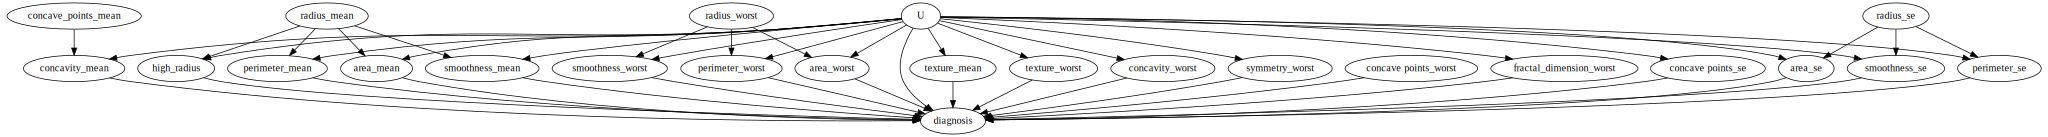

In [21]:
#area and perimeter functions of radius
from causalgraphicalmodels import CausalGraphicalModel
causal = CausalGraphicalModel(
    nodes=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'concavity_mean', 'concave_points_mean', 'radius_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'concave points_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis',
       'high_radius','U'],
    edges=[
        ("radius_mean", "perimeter_mean"), 
        ("radius_mean", "area_mean"),
        ("radius_mean","smoothness_mean"),
        ("concave_points_mean","concavity_mean"),
        ("radius_mean","high_radius"),
        ("radius_se", "perimeter_se"), 
        ("radius_se", "area_se"),
        ("radius_se","smoothness_se"),
        ("radius_worst", "perimeter_worst"), 
        ("radius_worst", "area_worst"),
        ("radius_worst","smoothness_worst"),
        ("concave_points_worst","concavity worst"),
        ("U","perimeter_mean"),
        ("U","area_mean"),
        ("U","texture_mean"),
        ("U","smoothness_mean"),
        ("U","concavity_mean"),
        ("U","perimeter_se"),
        ("U","area_se"),
        ("U","concave points_se"),
        ("U","smoothness_se"),
        ("U","perimeter_worst"),
        ("U","area_worst"),
        ("U","texture_worst"),
        ("U","smoothness_worst"),
        ("U","concavity_worst"),
        ("U","symmetry_worst"),
        ("U","fractal_dimension_worst"),
        ("U","high_radius"),
        ("U","diagnosis"),
        ("high_radius","diagnosis"),
        ("perimeter_mean","diagnosis"),
        ("area_mean","diagnosis"),
        ("texture_mean","diagnosis"),
        ("smoothness_mean","diagnosis"),
        ("concavity_mean","diagnosis"),
        ("smoothness_mean","diagnosis"),
        ("concavity_mean","diagnosis"),
        ("perimeter_se","diagnosis"),
        ("area_se","diagnosis"),
        ("smoothness_se","diagnosis"),
        ("concavity_se","diagnosis"),
        ("smoothness_se","diagnosis"),
        ("concave points_se","diagnosis"),
        ("concave points_worst","diagnosis"),
        ("perimeter_worst","diagnosis"),
        ("area_worst","diagnosis"),
        ("texture_worst","diagnosis"),
        ("smoothness_worst","diagnosis"),
        ("concavity_worst","diagnosis"),
        ("smoothness_worst","diagnosis"),
        ("symmetry_worst","diagnosis"),
        ("fractal_dimension_worst","diagnosis")
    ]
)
# draw return a graphviz `dot` object, which jupyter can render
causal.draw()

In [13]:
model= CausalModel(
        data = training,
        graph=causal_graph.replace("\n", " "),
        treatment='high_radius',
        outcome='diagnosis')

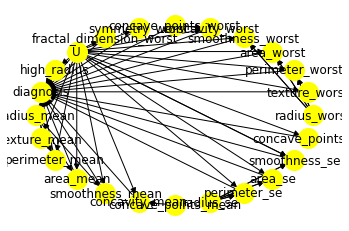

In [14]:
model.view_model()
#display(Image(filename="causal_model.png"))

**Identify the Causal Effect**

In [15]:
estimands = model.identify_effect()
print(estimands)

WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
──────────────(Expectation(diagnosis|texture_worst,perimeter_mean,concave_poin
d[high_radius]                                                                

                                                                              
ts_se,concavity_mean,smoothness_worst,radius_worst,concave_points_worst,area_m
                                                                              

                                                                              
ean,texture_mean,radius_mean,smoothness_mean,perimeter_worst,symmetry_worst,fr
                                                                              

                                                  

**Estimate the Causal Effect based on the statistical method**

In [16]:
#Causal Effect Estimation
#Method based on estimating the treatment assignment
estimate = model.estimate_effect(estimands,method_name = "backdoor.propensity_score_weighting")
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
──────────────(Expectation(diagnosis|texture_worst,perimeter_mean,concave_poin
d[high_radius]                                                                

                                                                              
ts_se,concavity_mean,smoothness_worst,radius_worst,concave_points_worst,area_m
                                                                              

                                                                              
ean,texture_mean,radius_mean,smoothness_mean,perimeter_worst,symmetry_worst,fr
                                                                              

                                                                              
actal_dimension_worst,area_worst,concavity_worst,concave_points

**From the result above, we can say that the probability of a breast tumor being diagnosed as malignant increases by 5.19%, when the radius mean is higher than 18**

<h3>Testing our assumption validity</h3>

**Random Common Cause** 
* adds an independent random variable as a common cause to the train data
* if the assumption was correct, the estimation should not change.

In [18]:
refute_train = model.refute_estimate(estimands,estimate, "random_common_cause")
print(refute_train)

Refute: Add a Random Common Cause
Estimated effect:-0.05195445338865268
New effect:-0.05016105957124503



**The effect changed by a negligible amount, meaning our assumption could be accurate**

**Data Subset Refuter**
* replaces the given dataset with a randomly selected subset
* if the assumption was correct, the estimation should not change that much.

In [19]:
refute_train = model.refute_estimate(estimands,estimate,"data_subset_refuter")
print(refute_train)

Refute: Use a subset of data
Estimated effect:-0.05195445338865268
New effect:-0.04960303109792518
p value:0.42



The change is by 0.001 which is quite small, hence our assumptions may be correct

**Placebo Treatment**
* replaces the true treatment variable with an independent random variable
* if the assumption was correct, the estimate should go close to zero.

In [20]:
refute_train = model.refute_estimate(estimands,estimate, "placebo_treatment_refuter")
print(refute_train)

Refute: Use a Placebo Treatment
Estimated effect:-0.05195445338865268
New effect:-0.0011527687683055615
p value:0.44



**Training using only the variables that point directly to the target variable**

In [30]:
cols = ['texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'concavity_mean','perimeter_se', 
           'area_se', 'smoothness_se', 'concave points_se','texture_worst', 'perimeter_worst', 'area_worst',
           'smoothness_worst', 'concavity_worst','symmetry_worst', 'fractal_dimension_worst', 'diagnosis',
           'high_radius']
train = df[cols]
train.sample()

texture_mean  perimeter_mean  area_mean  smoothness_mean  concavity_mean  \
231      1.812867       -0.832414   -0.73716        -1.959205        -0.90985   

     perimeter_se  area_se  smoothness_se  concave points_se  texture_worst  \
231      -0.89455 -0.69816      -1.129372          -1.406542       1.314602   

     perimeter_worst  area_worst  smoothness_worst  concavity_worst  \
231         -0.81736   -0.752884         -1.768278         -0.78338   

     symmetry_worst  fractal_dimension_worst  diagnosis  high_radius  
231       -0.083729                -0.724607          0        False

In [25]:
causal_graph = """
digraph{

texture_mean;
perimeter_mean;
area_mean;
smoothness_mean;
concavity_mean;
perimeter_se;
area_se;
smoothness_se;
concave_points_se;
texture_worst;
perimeter_worst;
area_worst;
smoothness_worst;
concavity_worst;

symmetry_worst;
fractal_dimension_worst;
U[label="Unobserved Confounders"];

U->perimeter_mean;U->area_mean;U->smoothness_mean;U->texture_mean;U->concavity_mean;U->perimeter_se;U->area_se;U->smoothness_se;
U->smoothness_se;U->concave_points_se;U->perimeter_worst;U->area_worst;U->smoothness_worst;U->texture_worst;U->concavity_worst;
U->symmetry_worst;U->fractal_dimension_worst;U->high_radius;U->diagnosis;

texture_mean->diagnosis;perimeter_mean->diagnosis;area_mean->diagnosis;smoothness_mean->diagnosis;concavity_mean->diagnosis;
perimeter_se->diagnosis;area_se->diagnosis;smoothness_se->diagnosis;concave_points_se->diagnosis;high_radius->diagnosis;
texture_worst->diagnosis;perimeter_worst->diagnosis;area_worst->diagnosis;smoothness_worst->diagnosis;
concavity_worst->diagnosis;concave_points_worst->diagnosis;symmetry_worst->diagnosis;fractal_dimension_worst->diagnosis;
}
"""

In [26]:
model2= CausalModel(
        data = training,
        graph=causal_graph.replace("\n", " "),
        treatment='high_radius',
        outcome='diagnosis')

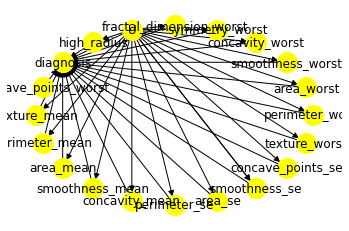

In [28]:
model2.view_model()

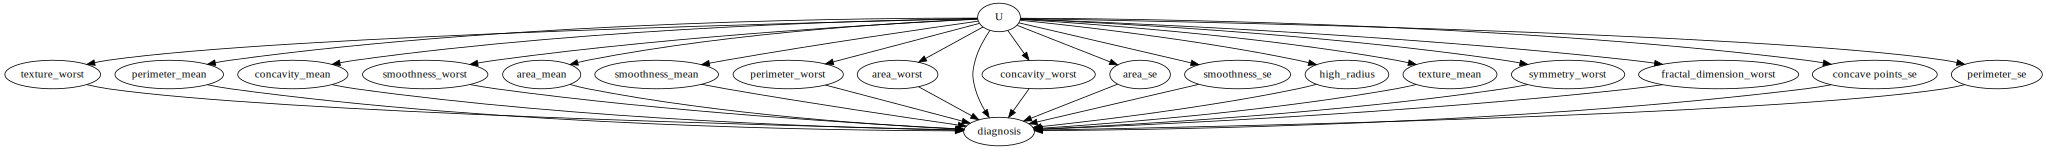

In [29]:
#area and perimeter functions of radius
from causalgraphicalmodels import CausalGraphicalModel
causal = CausalGraphicalModel(
    nodes=[ 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'concavity_mean','perimeter_se', 
           'area_se', 'smoothness_se', 'concave points_se','texture_worst', 'perimeter_worst', 'area_worst',
           'smoothness_worst', 'concavity_worst','symmetry_worst', 'fractal_dimension_worst', 'diagnosis',
           'high_radius','U'],
    edges=[
        ("U","perimeter_mean"),
        ("U","area_mean"),
        ("U","texture_mean"),
        ("U","smoothness_mean"),
        ("U","concavity_mean"),
        ("U","perimeter_se"),
        ("U","area_se"),
        ("U","concave points_se"),
        ("U","smoothness_se"),
        ("U","perimeter_worst"),
        ("U","area_worst"),
        ("U","texture_worst"),
        ("U","smoothness_worst"),
        ("U","concavity_worst"),
        ("U","symmetry_worst"),
        ("U","fractal_dimension_worst"),
        ("U","high_radius"),
        ("U","diagnosis"),
        ("high_radius","diagnosis"),
        ("perimeter_mean","diagnosis"),
        ("area_mean","diagnosis"),
        ("texture_mean","diagnosis"),
        ("smoothness_mean","diagnosis"),
        ("concavity_mean","diagnosis"),
        ("smoothness_mean","diagnosis"),
        ("concavity_mean","diagnosis"),
        ("perimeter_se","diagnosis"),
        ("area_se","diagnosis"),
        ("smoothness_se","diagnosis"),
        ("concavity_se","diagnosis"),
        ("smoothness_se","diagnosis"),
        ("concave points_se","diagnosis"),
        ("concave points_worst","diagnosis"),
        ("perimeter_worst","diagnosis"),
        ("area_worst","diagnosis"),
        ("texture_worst","diagnosis"),
        ("smoothness_worst","diagnosis"),
        ("concavity_worst","diagnosis"),
        ("smoothness_worst","diagnosis"),
        ("symmetry_worst","diagnosis"),
        ("fractal_dimension_worst","diagnosis")
    ]
)
# draw return a graphviz `dot` object, which jupyter can render
causal.draw()

In [33]:
estimands2 = model2.identify_effect()
print(estimands)

WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
──────────────(Expectation(diagnosis|texture_worst,perimeter_mean,concave_poin
d[high_radius]                                                                

                                                                              
ts_se,concavity_mean,smoothness_worst,concave_points_worst,area_mean,texture_m
                                                                              

                                                                              
ean,smoothness_mean,perimeter_worst,symmetry_worst,fractal_dimension_worst,are
                                                                              

                                                  

In [34]:
#Causal Effect Estimation
#Method based on estimating the treatment assignment
estimate = model2.estimate_effect(estimands2,method_name = "backdoor.propensity_score_weighting")
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
──────────────(Expectation(diagnosis|texture_worst,perimeter_mean,concave_poin
d[high_radius]                                                                

                                                                              
ts_se,concavity_mean,smoothness_worst,concave_points_worst,area_mean,texture_m
                                                                              

                                                                              
ean,smoothness_mean,perimeter_worst,symmetry_worst,fractal_dimension_worst,are
                                                                              

                                                            
a_worst,concavity_worst,area_se,smoothness_se,perimeter_se))
                    

In [35]:
#Random Common Cause
refute_train = model2.refute_estimate(estimands2,estimate, "random_common_cause")
print(refute_train)

Refute: Add a Random Common Cause
Estimated effect:-0.05192078145484069
New effect:-0.05196003693145185



In [37]:
#Data Subset Refuter
refute_train = model2.refute_estimate(estimands2,estimate,"data_subset_refuter")
print(refute_train)

Refute: Use a subset of data
Estimated effect:-0.05192078145484069
New effect:-0.05009660475497532
p value:0.44



In [38]:
#Placebo Treatment
refute_train = model2.refute_estimate(estimands2,estimate, "placebo_treatment_refuter")
print(refute_train)

Refute: Use a Placebo Treatment
Estimated effect:-0.05192078145484069
New effect:-0.0017306787522358318
p value:0.49



**Conclusion**

* After training using only the variables that point directly to the target variable, we observe that the mean value is approximately the same, 5.19%
* The assumption validity tests also return the same results as model 1